Dataset taken from https://www.kaggle.com/datasets/anandshaw2001/video-game-sales/data

# Import necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/alexxxey0/imt_assignment5/refs/heads/main/vgsales.csv')
print(df.head()) # Check if the dataset was loaded correctly

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


# Make sure that the data is clean

In [10]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

Missing Values:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Duplicate Rows: 0


The data is mostly clean, but some of the games miss they year and the publisher.

# Check the data types to make sure they are correct

In [9]:
# Check data types
print("\nData Types:")
print(df.info())


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


It seems that the year is a float, when it should be an integer. Let's convert it to the integer data type.

In [11]:
df['Year'] = df['Year'].astype('Int64')  # Keeps NaN as NaN

# Count the number of published games for each year

In [12]:
games_per_year = df['Year'].value_counts().sort_index()
print(games_per_year)

Year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     349
2001     482
2002     829
2003     775
2004     763
2005     941
2006    1008
2007    1202
2008    1428
2009    1431
2010    1259
2011    1139
2012     657
2013     546
2014     582
2015     614
2016     344
2017       3
2020       1
Name: count, dtype: Int64


It looks like the data cuts off at 2016, having only 3 games from 2017 and 1 game from 2020. Let's clear the dataset of the games released after 2016.

In [45]:
df = df[df['Year'] <= 2016]

# Count the number of games published for each platform

In [14]:
games_for_platform = df['Platform'].value_counts().sort_values(ascending=False)
print(games_for_platform)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


It appears that the most common platforms are Nintendo DS and PS2.

# Identify the most popular genres by the number of released games

In [17]:
games_in_genre = df['Genre'].value_counts().sort_values(ascending=False)
print(games_in_genre)

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64


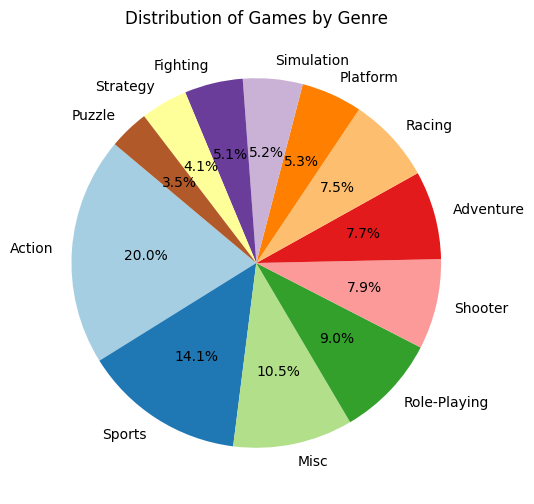

In [16]:
plt.figure(figsize=(10, 6))
plt.pie(games_in_genre, labels=games_in_genre.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a title
plt.title("Distribution of Games by Genre")

# Show the chart
plt.show()

It appears that the most common genres are action, sports and miscellaneous. The least common genres are puzzle, strategy and fighting.

# Track the changes in genres' popularity over the years by the number of released games



<Figure size 10000x600 with 0 Axes>

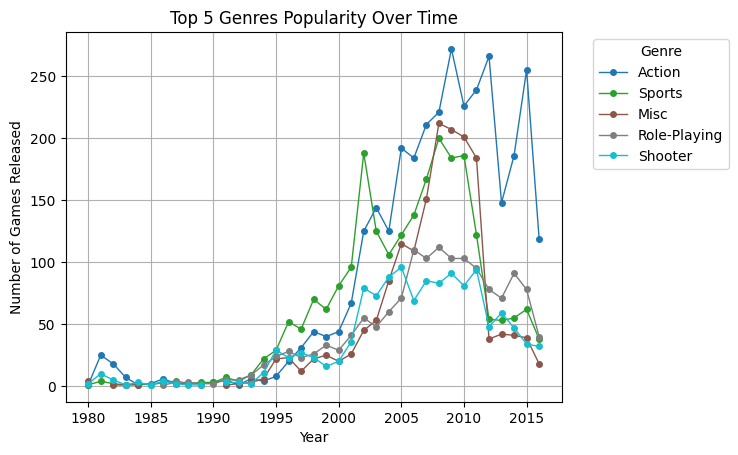

In [55]:
# Count the number of games per genre per year
genre_trend = df.groupby(['Year', 'Genre']).size().unstack()

# Get the top 5 genres based on total games
top_n_genres = genre_trend.sum().nlargest(5).index
genre_trend_top_n = genre_trend[top_n_genres]

# Plot the data for top N5genres
plt.figure(figsize=(12, 6))
genre_trend_top_n.plot(kind='line', marker='o', colormap='tab10', linewidth=1, markersize=4)

plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.title(f"Top 5 Genres Popularity Over Time")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()




It appears that sports games were the most popular until around 2002. After that, the action games overtook the top spot and remained there.
Games of miscellaneous genre were quite popular around 2007-2010, overtaking sports and almost overtaking action, but dropped in popularity around 2011-2012.
Role-playing games stayed quite low in popularity for most of the time, but became the second most popular genre around 2012 due to other genres decreasing in popularity.
Shooter appears to be the least popular genre across the top 5.

# Identify the most common genres by the number of global sales

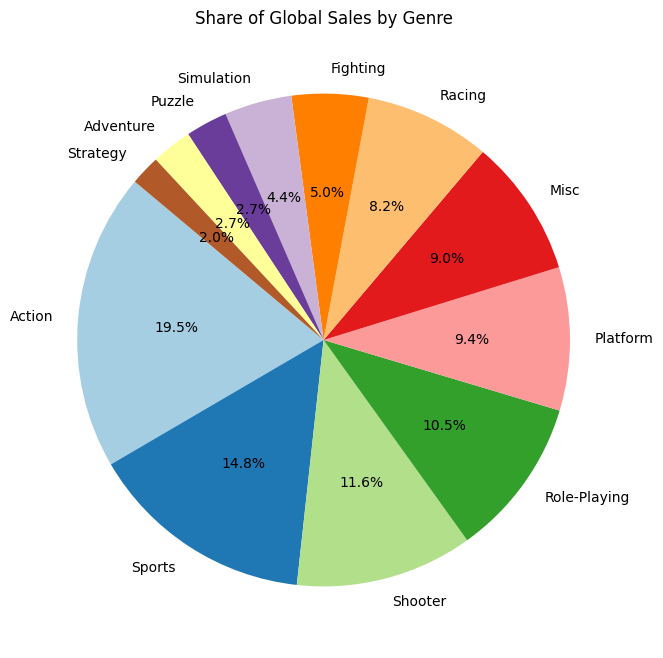

In [63]:
# Group by Genre and sum the global sales
genre_sales = df.groupby('Genre')['Global_Sales'].sum()

# Sort genres by global sales in descending order
genre_sales_sorted = genre_sales.sort_values(ascending=False)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_sales_sorted, labels=genre_sales_sorted.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a title
plt.title("Share of Global Sales by Genre")

# Show the pie chart
plt.show()


It appears that the most sold genres were action, sports and shooter.

# Track the changes in genres' popularity over the years by the number of global sales

<Figure size 1200x600 with 0 Axes>

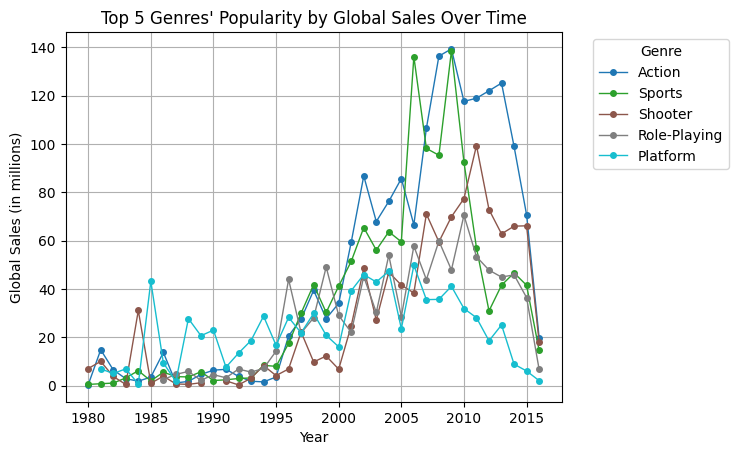

In [62]:
# Count global sales per genre per year (absolute values)
genre_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack()

# Get the top 5 genres based on total global sales
top_5_genres = genre_sales.sum().nlargest(5).index

# Filter to include only the top 5 genres
genre_sales_top_5 = genre_sales[top_5_genres]

# Plot the data
plt.figure(figsize=(12, 6))
genre_sales_top_5.plot(kind='line', marker='o', markersize=4, linewidth=1, colormap='tab10')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.title("Top 5 Genres' Popularity by Global Sales Over Time")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()



It appears that the platform games were very popular until approximately 1997, but after that other genres overtook them.
Action and sports games started to increase in popularity around 1995 and peaked between 2005 and 2010, reaching around 140 million worldwide sales.
Shooter games started to increase in popularity around 2000 and peaked at 2010 at 100 million worldwide sales.
Role-playing games went up and down between 1995 and 2010 with a moderate overall increase, peaking at around 70 million.